# Exam: MES

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

The follwing python cell imports all required packages to solve all three exercises.

In [1]:
# write your code here
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import math
import warnings
warnings.filterwarnings("ignore")

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Approach: 


We define all relevant symbols as sympy symbols to solve for the expression above analytically. We then define the utility function and the constraints and solve for the optimal L. To prove that our result corresponds to the optimal labor supply choice from the question we check if they are equivalent.

In [18]:
# Step 1: Creating symbols for the relevant variables for sympy
w = sm.symbols('w')
tau = sm.symbols('tau')
G = sm.symbols('G')
C = sm.symbols('C')
alpha = sm.symbols('alpha')
v = sm.symbols('v')
L = sm.symbols('L')
kappa = sm.symbols('kappa')
w_tilde = sm.symbols('w_tilde')

# Step 2: Creating the utility function
utility_1a = sm.ln(C**(alpha) * G**(1 - alpha)) - v * ((L**2)/2)

# Step 3: Creating constraints
C_con = kappa + (1 - tau) * w * L
w_con = (w_tilde/(1 - tau))

# Step 4: Substitute for C
utility_1a_sub_c = utility_1a.subs(C, C_con)

# Step 5: Substitute for w
utility_1a_sub_w = utility_1a_sub_c.subs(w, w_con)

# Step 5: FOC
foc = sm.diff(utility_1a_sub_w, L)

# Step 6: Solve for L
solution_1a = sm.solve(foc, L, dict=True)

# Step 7: Calculate all solutions
for solution in solution_1a:
   sm.Eq(L, solution[L])

# Step 8: Choose relevant solution
desired_solution_1a = solution_1a[1][L]
display(desired_solution_1a)

# Step 9: Define the optimal labor supply choice from question 1
objective_1a = ((-kappa + sm.sqrt(kappa**2 + 4 * (alpha/v) * w_tilde**2))/(2 * w_tilde))
display(objective_1a)

# Step 10: Evaluate the expressions for specific values
variable_values = {
   w: 1,
   tau: 0.3,
   alpha: 0.5,
   v: (1/(2 * 16**2)),
   kappa: 1,
   w_tilde: 0.7
}
evaluated_desired_solution_1a = desired_solution_1a.evalf(subs=variable_values)
evaluated_objective_1a = objective_1a.evalf(subs=variable_values)

# Step 11: Compare the evaluated values for numerical equivalence
if sm.Abs(evaluated_desired_solution_1a - evaluated_objective_1a) < 1e-6: # calulate absolute difference 
   print("The expressions are numerically equivalent.")
else:
   print("The expressions are not numerically equivalent.")

(-kappa*v + sqrt(v*(4*alpha*w_tilde**2 + kappa**2*v)))/(2*v*w_tilde)

(-kappa + sqrt(4*alpha*w_tilde**2/v + kappa**2))/(2*w_tilde)

The expressions are numerically equivalent.


Results:

We get the same optimal labor supply choice. For our result v is not being simplified but if it would be simplified we would get this solution $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$. To prove this we input the variable values defined in the exercise and show that they are equivalent.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [19]:
# The baseline parameters for all the following questions in Problem 1 
alpha = 0.5
kappa = 1.0
v = 1 / (2 * (16 ** 2))
w = 1.0
tau = 0.3
G = 1.5

Approach: 

We construct an optimization solver which calculates the optimal labor choice for varying wages. Moreover, we plot those results.

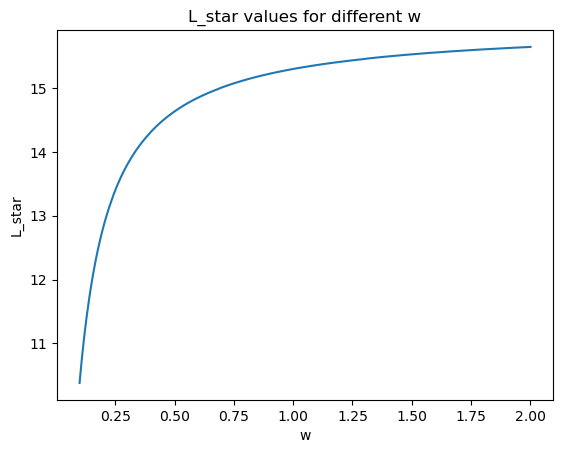

In [20]:
# Step 1: Question 2 specific parameter
w_vec = np.linspace(0.1, 2, 200)

# Step 2: Create the Utility function
def utility_1b(L, alpha, kappa, tau, w, G, v):
   utility = math.log(((kappa + (1 - tau) * w * L) ** alpha) * (G ** (1 - alpha)))
   disutility = -v * (L ** 2 / 2)
   return utility + disutility

# Step 3: Define Objective Function, we optimize for L
def objective_1b(L):
   return -utility_1b(L, alpha, kappa, tau, w, G, v)

# Step 4: Define the bounds for L
bounds = [(0, 24)]  

# Step 5: Initialize a list to store optimal L values
L_star_1b = []

# Step 6: Solve the optimization problem for each w in w_vec
for w in w_vec:

   result_1b = minimize(objective_1b, x0=[0], bounds=bounds)
   # Extract the optimal solution
   L_star_1b_pre = result_1b.x[0]
   # Store the optimal L value
   L_star_1b.append(L_star_1b_pre)

# Create a plot
plt.plot(w_vec, L_star_1b)
plt.xlabel('w')
plt.ylabel('L_star')
plt.title('L_star values for different w')
plt.show()

Results:

We can see in the plot that there is a positive relationship between wages and the optimal labor choice. We also identify diminishing marginal returns of the labor choice for an increasing w. Economically, this means higher wages incentivises higher amounts of labor and labor choice.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


Approach:

We loop over 1000 different tau values and calculate the corresponding L, G and utility. Furthermore, we plot the results in both 2d and 3d form. 

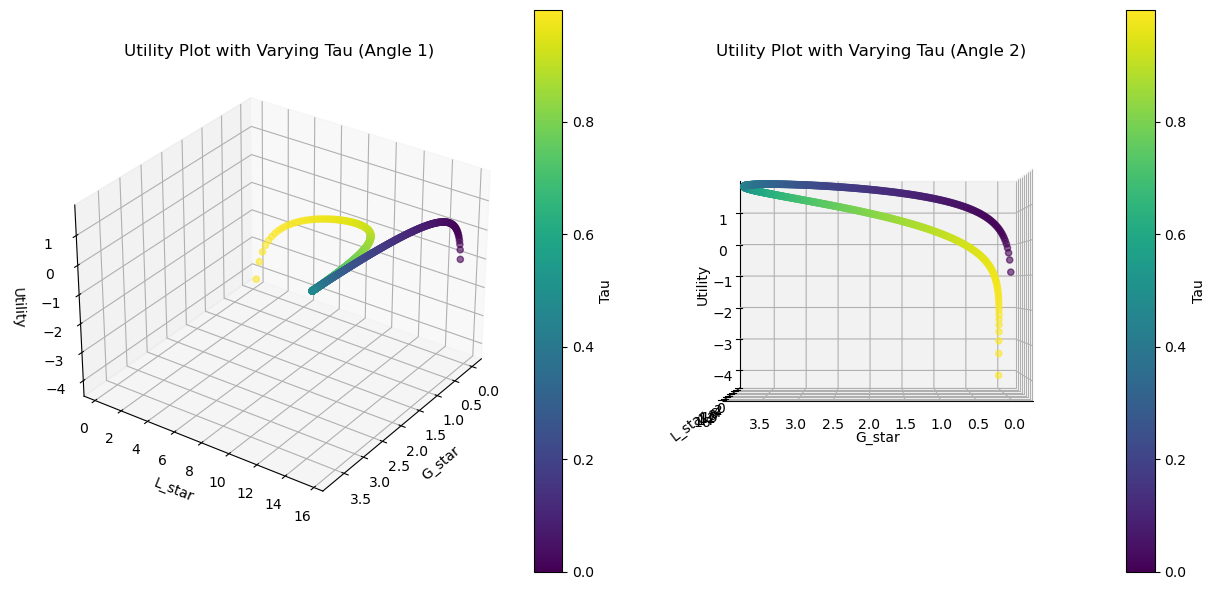

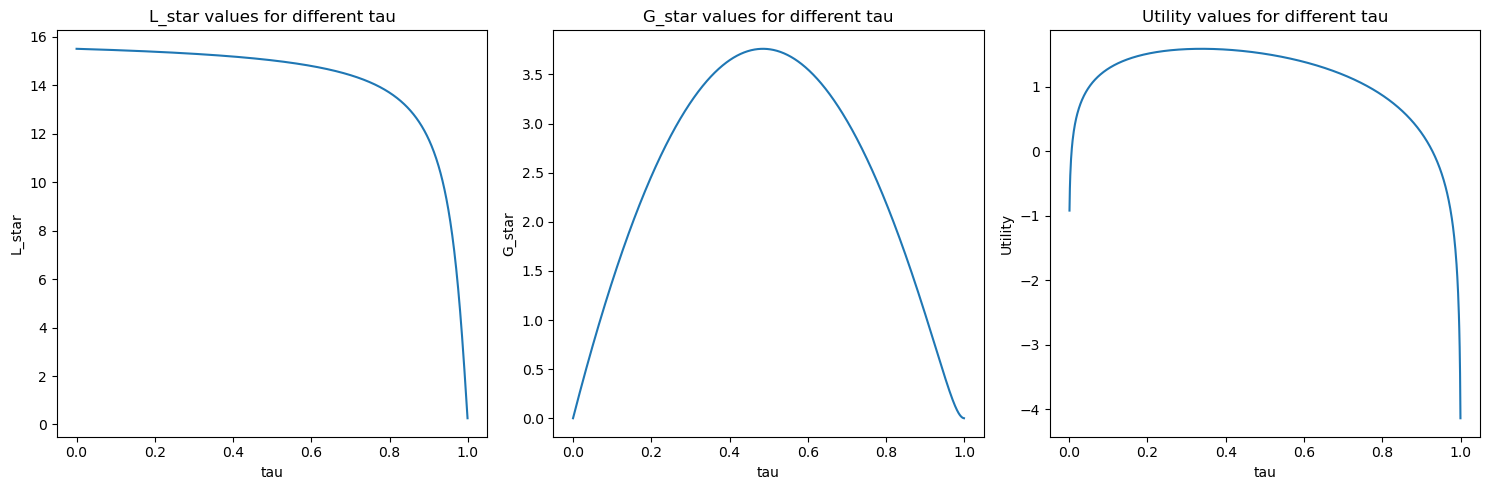

In [21]:
# Step 1: Generate 1000 equally spaced tau values between 0 and 1
tau_values_1c = np.linspace(0, 1, 1000, endpoint=False)   
w = 1 # w is fixed at 1 again

# Step 2: Initialize lists to store optimal L, G, tau and the corresponding utility values
L_star_1c = []
G_star_1c = []
utility_1c = []
tau_color_1c = []  # Store tau values for color mapping in the plot

# Step 3: Generate loop over all tau values and calculate the respective L, G and utility values
for i in tau_values_1c:
    L_star_1c_pre = ((-kappa + np.sqrt(kappa**2 + 4 * (alpha / v) * ((1 - i) * w)**2)) / (2 * (1 - i) * w))
    G_star_1c_pre = i * w * L_star_1c_pre * ((1 - i) * w)
    utility_1c_pre = np.log((kappa + (1 - i) * w * L_star_1c_pre)**(alpha) * G_star_1c_pre**(1 - alpha)) - v * ((L_star_1c_pre**2) / 2)
    L_star_1c.append(L_star_1c_pre)
    G_star_1c.append(G_star_1c_pre)
    utility_1c.append(utility_1c_pre)
    tau_color_1c.append(i)

# Step 4: Create figure to plot the results, we create two subplots to look at the 3d graph from different angles
fig = plt.figure(figsize=(12, 6))

# 4.1 First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(G_star_1c, L_star_1c, utility_1c, c=tau_color_1c, cmap='viridis', alpha=0.6)
ax1.set_xlabel('G_star')
ax1.set_ylabel('L_star')
ax1.set_zlabel('Utility')
ax1.view_init(elev=30, azim=35)
ax1.set_title('Utility Plot with Varying Tau (Angle 1)')

# 4.2 Add colorbar to subplot 1
sm1 = plt.cm.ScalarMappable(cmap='viridis')
sm1.set_array(tau_color_1c)
cbar1 = plt.colorbar(sm1, ax=ax1)
cbar1.set_label('Tau')

# 4.3 Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(G_star_1c, L_star_1c, utility_1c, c=tau_color_1c, cmap='viridis', alpha=0.6)
ax2.set_xlabel('G_star')
ax2.set_ylabel('L_star')
ax2.set_zlabel('Utility')
ax2.view_init(elev=0, azim=90)
ax2.set_title('Utility Plot with Varying Tau (Angle 2)')

# 4.4 Add colorbar to subplot 2
sm2 = plt.cm.ScalarMappable(cmap='viridis')
sm2.set_array(tau_color_1c)
cbar2 = plt.colorbar(sm2, ax=ax2)
cbar2.set_label('Tau')

# 4.5 Display the plots
plt.tight_layout()
plt.show()

# Step 5: Create a 2d plot for each variable and tau individually 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 5.1 Plot for tau and optimal L_star
axes[0].plot(tau_values_1c, L_star_1c)
axes[0].set_xlabel('tau')
axes[0].set_ylabel('L_star')
axes[0].set_title('L_star values for different tau')

# 5.2 Plot for tau and optimal G_star
axes[1].plot(tau_values_1c, G_star_1c)
axes[1].set_xlabel('tau')
axes[1].set_ylabel('G_star')
axes[1].set_title('G_star values for different tau')

# 5.3 Plot for tau and utility
axes[2].plot(tau_values_1c, utility_1c)
axes[2].set_xlabel('tau')
axes[2].set_ylabel('Utility')
axes[2].set_title('Utility values for different tau')

# 5.4 Display the plots
plt.tight_layout()
plt.show()

Results: 

For increasing tau optimal L falls. This is logical as higher wages means lower willingness to work. For G there seems to be a peak at tau=0.5. This indicates that taxes at 50% maximize the possible government consumption. The highest utility should be around tau=0.3 after graphical inspection. This will be further evaluated in question 4.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

Approach: 

We set up an optimizer which calulates the utility for tau and plot the results.

Optimal tau: 0.331
Optimal utility: 1.807


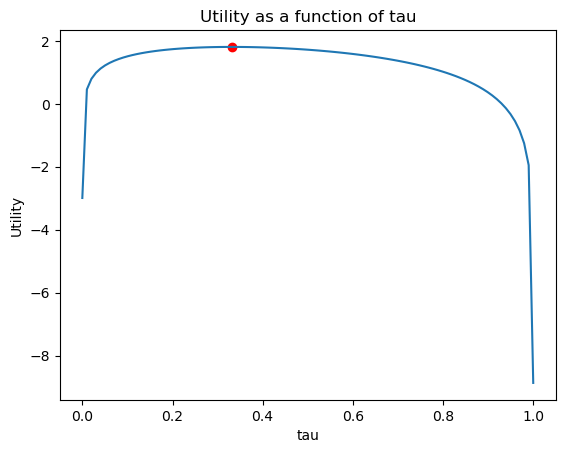

In [29]:
# Step 1: Define the utility
def utility_1d(tau, kappa, w, alpha, v):
   utility = math.log(((kappa + (1-tau)*w*(-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w)))**alpha)*(tau * w * (-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w))*((1-tau)*w))**(1-alpha))
   disutility = v*(((-kappa + ((kappa**2) + 4 * (alpha/v) * ((1-tau)*w)**2)**0.5)/(2*((1-tau)*w))**2)/2)
   return utility - disutility

# Step 2: Define the objective
def objective_1d(tau):
   return -utility_1d(tau, kappa, w, alpha, v)

# Step 3: Set bounds excluding 0 and 1
bounds = [(0.00001, 0.99999)]

# Step 4: Solve the optimization problem
result_1d = minimize(objective_1d, x0=0, bounds=bounds)

# Step 5: Extract the optimal solution
tau_star_1d = result_1d.x[0]

# Step 6: Calculate the optimal utility
utility_star_1d = utility_1d(tau_star_1d, kappa, w, alpha, v)

# Step 7: Print the optimal tau and utility
print(f"Optimal tau: {tau_star_1d:.3f}")
print(f"Optimal utility: {utility_star_1d:.3f}")

# Step 8: Calculate utility values for varying tau and store them in a list
tau_values_1d = np.linspace(0.00001, 0.99999, 100)  # Generate 100 tau values between 0.00001 and 0.99999
utility_values_1d = [utility_1d(tau, kappa, w, alpha, v) for tau in tau_values_1d]  # Calculate utility for each tau value

# Step 9: Plot the results 
plt.plot(tau_values_1d, utility_values_1d)
plt.xlabel('tau')
plt.ylabel('Utility')
plt.title('Utility as a function of tau')
plt.scatter(tau_star_1d, utility_star_1d, color = 'red')
plt.show()

Results:

We find the optimal utility 2.852 at tau 0.332. We illustrate this with a red point in the utility plot.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

Approach:

We create a first loop to distinguish between the two cases. We then loop through different values for G, to use them as inputs and thus calculate the optimal L in respect to the utility function. These must fulfill the condition. As soon as the condition is met we break and print our results.

In [30]:
# Step 1: We use the optimal tau from the previous question and define sigma, epsilon and rho for the two cases 
tau = tau_star_1d
epsilon = 1
sigma = [1.001, 1.5]
rho = [1.001, 1.5]
G = np.linspace(1, 10, 10000)

# Step 2: Create a loop for the two cases 
for i, j in zip (sigma, rho):
    # Step 3: Create a loop over different values for G
    for g in G:
        # Step 4: Define the utility function
        def utility_1e(alpha, g, i, j, v, L, epsilon, w, tau, kappa): 
            numerator = ((alpha * (kappa + (1 - tau) * w * L) ** ((i - 1) / i)) + ((1 - alpha) * g ** ((i - 1) / i))) ** (i / (i - 1))
            numerator = numerator ** (1 - j) - 1
            denominator = 1 - j
            term1 = numerator / denominator
            term2 = v * (L ** (1 + epsilon)) / (1 + epsilon)
            result = term1 - term2
            return result
        
        # Step 5: Define objective function
        def objective_1e(L):
            return -utility_1e(alpha, g, i, j, v, L, epsilon, w, tau, kappa) 

        # Step 6: Set bounds
        bounds = [(0, 24)]

        # Step 7: Maximize L for given G and test whether condition holds
        result_1e = minimize(objective_1e, x0=[0], bounds=bounds) 
        L_star_1e = result_1e.x[0] # Deliver for given G our L_star
        condition_1e = tau * w * L_star_1e - g # Calculate the condition
        if abs(condition_1e) < 0.001:  # Test whether condition is met
            print(f"The following G solves the given equation: {g:.3f} ", ", setup for i and j:", i, ",", j)
            break # Break loop when the condition is met

The following G solves the given equation: 5.049  , setup for i and j: 1.001 , 1.001
The following G solves the given equation: 3.464  , setup for i and j: 1.5 , 1.5


Result: 

For the first set up we get a G of 5.049 and for the second case we have G equal to 3.464.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

Approach: 

We calculate pairs of tau and G that satisfy the condition and examine which pair maximizes the utility.

In [33]:
# We use the utility function from the previous question 
# Step 1: Define a function to find optimal tau
def find_tau_star_1f(sigma, rho):

    # Step 2: Define a new feasible range for G
    G_range = np.linspace(1, 10, 100)

    # Step 3: Set up initial values
    max_utility = -np.inf
    tau_star_1f = None
    G_star_1f = None
    L_star_1f = None
    utility_1f = None

    # Step 4: Loop over the G range
    for G in G_range:
        # Step 5: Define new objective function
        def objective_1f(tau):
            # Step 6: Calculate L_star_1f using the given tau and G
            L_star_1f = G / (tau * w)
            # Step 7: Compute utility with the calculated L_star_1f
            return -utility_1e(alpha, G, sigma, rho, v, L_star_1f, epsilon, w, tau, kappa)

        # Step 8: Find the maximal utility
        result = minimize(objective_1f, x0=1) 
        if result.success and -result.fun > max_utility:
            max_utility = -result.fun
            tau_star_1f = result.x[0]
            G_star_1f = G
            L_star_1f = G / (tau_star_1f * w)
            utility_1f = max_utility

    return tau_star_1f, G_star_1f, L_star_1f, utility_1f

# Step 9: Calculate and print output for the two cases
# Case 1: sigma = 1.001, rho = 1.001
sigma_1 = 1.001
rho_1 = 1.001
tau_star_1f_1,G_star_1f_1 , L_star_1f_1, utility_1f_1 = find_tau_star_1f(sigma_1, rho_1)
print("Case 1:")
print(f"Optimal tau: {tau_star_1f_1:.3f}")
print(f"Optimal G: {G_star_1f_1:.3f}")
print(f"Optimal L_e1: {L_star_1f_1:.3f}")
print(f"Optimal utility value: {utility_1f_1:.3f}")
print()

# Case 2: sigma = 1.5, rho = 1.5
sigma_2 = 1.5
rho_2 = 1.5
tau_star_1f_2, G_star_1f_2 , L_star_1f_2, utility_1f_2 = find_tau_star_1f(sigma_2, rho_2)
print(f"Case 2:")
print(f"Optimal tau: {tau_star_1f_2:.3f}")
print(f"Optimal G: {G_star_1f_2:.3f}")
print(f"Optimal L_e1: {L_star_1f_2:.3f}")
print(f"Optimal utility value: {utility_1f_2:.3f}")

Case 1:
Optimal tau: 0.063
Optimal G: 1.000
Optimal L_e1: 16.000
Optimal utility value: 1.136

Case 2:
Optimal tau: 0.214
Optimal G: 2.636
Optimal L_e1: 12.302
Optimal utility value: 1.018


Results: 

We find an optimal tau of 0.063 for case 1 and 0.214 for case 2.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

Approach:



In [2]:
# Step 1: Set the values for eta and w
eta = 0.5
w = 1

# Step 2: Define a list of kappa values
kappa_values = [1, 2]

# Step 3: Define the profit function
def profit_2a(ell, kappa, eta, w):
   profit = kappa * ell**(1-eta) - w*ell
   return profit

# Step 4: Define objective function
def objective_2a(ell, kappa, eta, w):
   return -profit_2a(ell, kappa, eta, w)

# Step 5: Print numerical solution
print('The numerical solution for the optimal ell')

# Step 6: Iterate over each kappa value
for kappa in kappa_values:
   # Set bounds
   bound = [(0, None)]
   # Solve the optimization problem
   result_2a = minimize(objective_2a, x0=0, bounds=bound, args=(kappa, eta, w))
   # Extract optimal solution
   ell_star_2a = result_2a.x[0]
   # Print the result
   print(f"Optimal ell for kappa = {kappa}: {ell_star_2a:.2f}")

# Step 7: Plug in values for comparison
def solve_ell_comparison(kappa, eta, w):
   ell = (((1-eta)*kappa)/w)**(1/eta)
   return ell

# Step 8: Print the solution for ell
print('The plug in solution for the optimal ell')

# Step 9: Loop over both kappas and print solution
for kappa in kappa_values:
   optimal_l_analytical = solve_ell_comparison(kappa, eta, w)
   print(f"Optimal ell for kappa = {kappa}: {optimal_l_analytical:.2f}")

The numerical solution for the optimal ell
Optimal ell for kappa = 1: 0.25
Optimal ell for kappa = 2: 1.00
The plug in solution for the optimal ell
Optimal ell for kappa = 1: 0.25
Optimal ell for kappa = 2: 1.00


Both solution approaches yield the same result.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

Approach:

After defining the relevant parameters we select a set seed and loop over a shock series of the length 250. Furthermore, we calculate the ex post value after 120 months. We then use this result to calculate the average ex ante value over the 250 shocks.

In [3]:
# Step 1: Define additional parameters which will be used in all questions of problem 2 going foward
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1.0

# Step 2: Set a seed for reproducibility
np.random.seed(0)  

# Step 3: Define the number of shock series. K=250 does not affect the results substantially
K = 250

# Step 4: Initialize variables
H_2b = 0

# Step 5: Simulate shock series
for k in range(K):
    kappa = np.zeros(120)
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

    # Step 6: Generate shock series for 120 months
    for t in range(120):
        if t == 0:
            kappa[t] = 1  # Initial shock
        else:
            kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

    # Step 7: Calculate the ex post value of the salon for the shock series
    h = 0
    ell_previous = 0
    profits = np.zeros(120)
    adjustment_costs = np.zeros(120)

    for t in range(120):
        ell_t = ((1 - eta) * kappa[t] / w) ** (1 / eta)  # Policy from Question 1
        profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
        adjustment_costs[t] = 0 if ell_t == ell_previous else iota
        ell_previous = ell_t

        h += R ** -t * (profits[t] - adjustment_costs[t])

    # Step 8: Sum up the ex post values
    H_2b += h

# Step 9: Calculate the average of ex ante value by dividing by K
H_2b /= K

# Step 10: Print the optimal H
print(f"The ex ante expected value (H) is: {H_2b:.3f}")

The ex ante expected value (H) is: 27.351


Results:

We get an ex ante value of 27.351 if the policy from question 1 is followed. We determined the length of the shock series at 250 as enough to not significantly affect our results.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

Approach: 

We follow the same approach as in question 2 but account for the new policy via an if statement. This statement takes into account the the two cases under the new policy

In [4]:
# Step 1: Define the policy parameter delta and set seed
delta = 0.05 
np.random.seed(0) 
H_2c = 0

# Step 2: Simulate shock series
for k in range(K):
    kappa = np.zeros(120)
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

    # Step 3: Generate shock series for 120 months
    for t in range(120):
        if t == 0:
            kappa[t] = 1  # Initial shock
        else:
            kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

    # Step 4: Calculate the ex post value of the salon for the shock series
    h = 0
    ell_previous = 0
    profits = np.zeros(120)
    adjustment_costs = np.zeros(120)

    for t in range(120):
        ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta)  # Policy with Δ = 0
        if np.abs(ell_previous - ell_star) > delta: # Update code to account for the new policy
            ell_t = ell_star
        else:
            ell_t = ell_previous

        profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
        adjustment_costs[t] = 0 if ell_t == ell_previous else iota
        ell_previous = ell_t  # update ell_previous for the next period

        h += R ** -t * (profits[t] - adjustment_costs[t])
    
    # Step 5: Sum up the ex post values
    H_2c += h

# Step 6: Calculate the average of ex ante value by dividing by K
H_2c /= K

# Step 7: Print the optimal H
print(f"The ex ante expected value (H) for the updated policy is: {H_2c:.3f}")


The ex ante expected value (H) for the updated policy is: 28.038


Result:

With the updated policy ee get an ex ante value of 28.038. Therefore, we find that the new policy improves profitability.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

Approach:

We us the method from question 3 and construct an optimizer that loops over a range of deltas to find the delta which maximizes H.

Optimal Delta: 0.117
Max H: 29.075


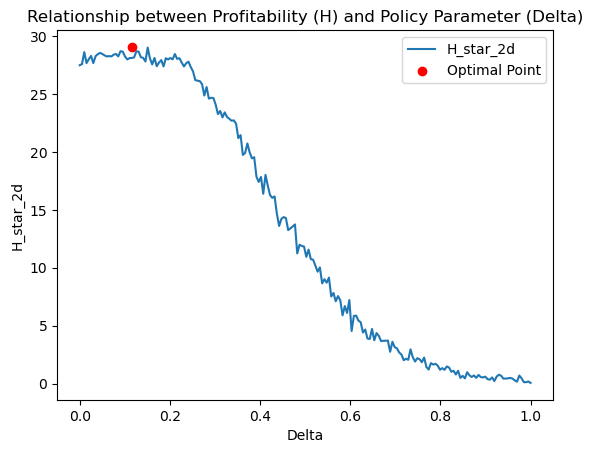

In [5]:
# Step 1: Set a seed 
np.random.seed(0)  

# Step 2: Initialize variables
H_star_2d = []
delta_range = np.linspace(0, 1, num=200)

# Step 3: Define the objective function to minimize and use the model set up as the previous questions
def objective_2d(delta):
    H_2d = 0

    # Simulate shock series
    for k in range(K):
        kappa = np.zeros(120)
        epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

        # Generate shock series for 120 months
        for t in range(120):
            if t == 0:
                kappa[t] = 1 
            else:
                kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

        # Calculate the ex post value of the salon for the shock series
        h = 0
        ell_previous = 0
        profits = np.zeros(120)
        adjustment_costs = np.zeros(120)

        for t in range(120):
            ell_star = ((1 - eta) * kappa[t] / w) ** (1 / eta) 
            if np.abs(ell_previous - ell_star) > delta:
                ell_t = ell_star
            else:
                ell_t = ell_previous

            profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
            adjustment_costs[t] = 0 if ell_t == ell_previous else iota
            ell_previous = ell_t

            h += R ** -t * (profits[t] - adjustment_costs[t])

        H_2d += h

    # Calculate the average ex ante value
    H_2d /= K

    return -H_2d  

# Step 4: Maximize H
result = minimize_scalar(objective_2d, bounds=(0, 0.2), method='bounded') # Bounds for 

# Step 5: Store results for delta and H
delta_star_2d = result.x
max_H_2d = -result.fun

# Step 6: Store H values
for delta in delta_range:
    H_star_2d.append(-objective_2d(delta))

# Step 7: Output optimal H and delta
print(f"Optimal Delta: {delta_star_2d:.3f}")
print(f"Max H: {max_H_2d:.3f}")

# Step 8: Plot H vs. delta
plt.plot(delta_range, H_star_2d, label='H_star_2d')
plt.scatter(delta_star_2d, max_H_2d, color='red', label='Optimal Point')
plt.xlabel('Delta')
plt.ylabel('H_star_2d')
plt.title('Relationship between Profitability (H) and Policy Parameter (Delta)')
plt.legend()
plt.show()

Result:

H is maximized for a delta of 0.117 at thepoint of 29.075. If delta is increase past 0.2 we see a continuous drop in H until it converges to 0. This is due to the fact that the higher delta leads to decrease probability to make use of the optimal policy.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



Approach: 

Initially, the setup assumes a constant wage at w=1. The previous policies only change the number of hairdressers ell in response to the shocks. We extend the model by allowing for w to change according to the development of ell. If ell today is significantly bigger than ell yesterday, the salon decreases the wages. Conversely, a decrease in ell results in higher wages. The salon does this to keep a stable labor supply. Changes in ell are significant if they are larger than 0.007. For decreasing ell, the salon increases wage by 0.9% and for increasing ell, the salon decreases wages by 1.3%. 

In [6]:
# Step 1: Set a seed
np.random.seed(0) 

# Step 2: Initialize variables
H_2e = 0

# Step 3: Same method as in question 3 and for except
# Simulate shock series
for k in range(K):
    kappa = np.zeros(120)
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=120)

    # Generate shock series for 120 months
    for t in range(120):
        if t == 0:
            kappa[t] = 1 
        else:
            kappa[t] = np.exp(np.log(kappa[t - 1]) * rho + epsilon[t])

    # Calculate the ex post value of the salon for the shock series
    h = 0
    ell_previous = 0
    profits = np.zeros(120)
    adjustment_costs = np.zeros(120)

    # Step 4: Implement our new policy
    for t in range(120):
        ell_t = ((1 - eta) * kappa[t] / (1 + 0.1 * ell_previous)) ** (1 / eta)  
        if ell_previous == 0: # Set the wage for the first worker to 1
            w = 1 
        elif ell_t - ell_previous > 0.007: # The case of a significant increase of ell
            w = w * 0.987                  # w decreases by 1.3%
        elif ell_t - ell_previous < 0.007: # The case of a significant decrease of ell
            w = w * 1.009                  # w increases by 0.9%
        else:                              # no significant change in ell, wage remains unchanged
            w = w
        profits[t] = kappa[t] * ell_t ** (1 - eta) - w * ell_t
        adjustment_costs[t] = 0 if ell_t == ell_previous else iota
        ell_previous = ell_t

        h += R ** -t * (profits[t] - adjustment_costs[t])

    H_2e += h

# Calculate the average ex ante value
H_2e /= K

# Step 5: Print the optimal H
print(f"The ex ante expected value (H) for our policy is: {H_2e:.3f}")

The ex ante expected value (H) for our policy is: 28.230


Results: 

Using these percentage changes in wages, the salon is able to account for labor supply changes. Whether this policy changes profitability is dependent on how the wage changes are defined. In our setup, the profitability increases slightly, while keeping realistic wages. If the wage decreases dominate the increases, the policy leads to further profitability increases.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [8]:
# defniing the griewank functions
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Approach:

First, we implement the refined global optimizer. For the warmup rounds, the optimizer is run with completely random values. After the warmup, we use a weighing process to narrow down the focus with each iteration. Chi is a parameter that weighs the random initial guess x_k depending on the iteration count. The higher the iteration count, chi declines and the current best guess is weighted more dominantly. Thus, x_k0 is chosen less randomly and narrows down towards the global minimum.

K_warmup = 10:
Final Solution: [-8.99188951e-09  1.20159921e-08]
Number of Iterations: 277


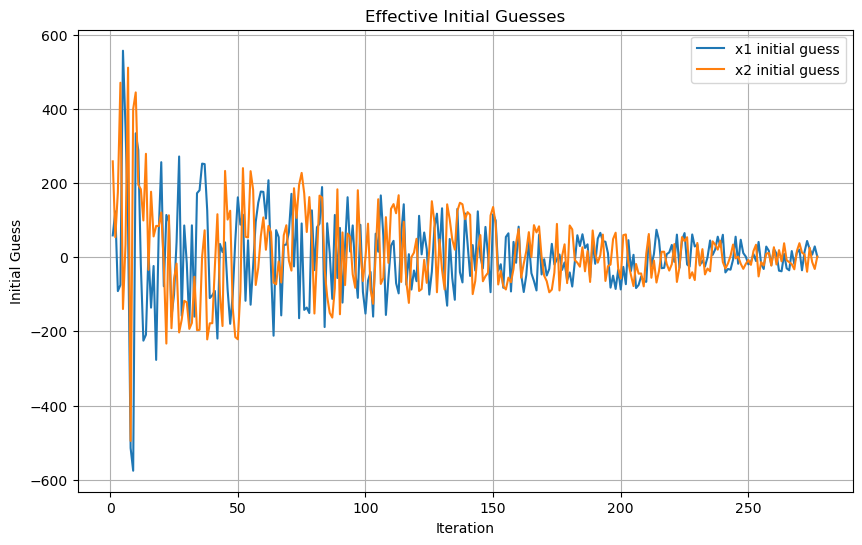

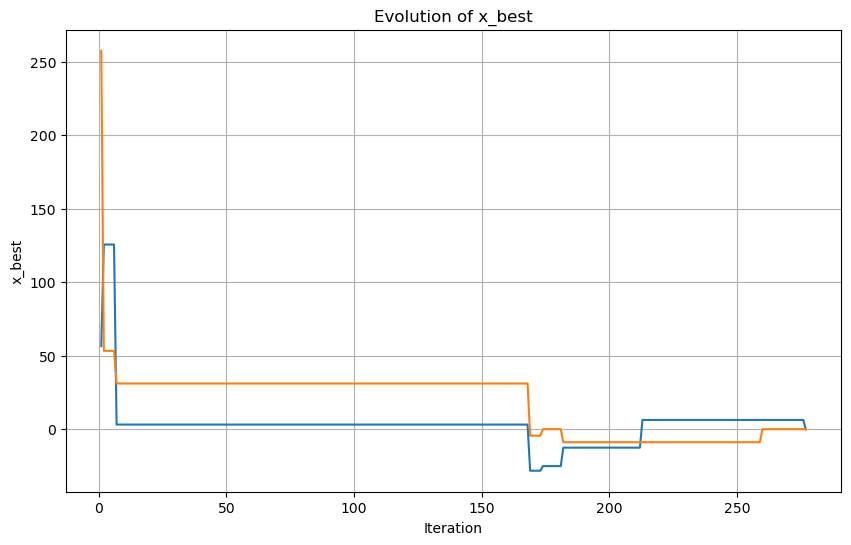

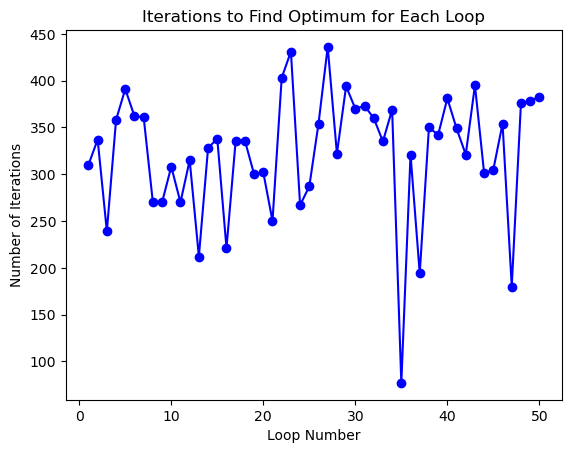

In [21]:
# Step 1: setup
bounds = [-600, 600]
tolerance = 1e-8
K_warmup = 10
K_max = 1000
np.random.seed(0)

# Step 2: Define the refined global optimizer
def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    # Initialize the parameters
    x_best = None  
    f_best = None  
    iterations = 0  
    initial_guesses = []  
    x_best_values = []  

    # Step 3: Execute the iteration process
    for k in range(K_max):
        iterations += 1  # increase the iteration count
        x = np.random.uniform(bounds[0], bounds[1], size=2)  # set up a random initial guess for x_k
        if k < K_warmup: # within warmup, use the initial guess for the optimizer
            x
        else:
            chi = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))  # After the warmup, first calculate chi
            x = chi * x + (1 - chi) * x_best  # Then, use chi to calculate x^k0.

        initial_guesses.append(x)  # Store the initial guess

        # Step 4: Run optimizer with current initial guess
        result = minimize(griewank, x, method='BFGS', tol=tolerance)
        x_k_star = result.x  # Store the results from the optimizer
        f_k_star = result.fun  

        # Step 5: Update the best solution and function value (if it fulfills the condition)
        if f_best is None or f_k_star < f_best:
            x_best = x_k_star
            f_best = f_k_star

        x_best_values.append(x_best)  # Store x_best

        # Step 6: Check if the global minimum is found
        if f_best < tolerance:
            break

    return x_best, iterations, initial_guesses, x_best_values

# Step 6: Run the refined global optimizer
best_solution, num_iterations, initial_guesses, x_best_values = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)

# Step 7: Print the final solution and the number of iterations
print(f"K_warmup = {K_warmup}:")
print("Final Solution:", best_solution)
print("Number of Iterations:", num_iterations)

# Step 8: Plot the initial guesses
x_values = np.arange(1, num_iterations + 1)
x1_initial = [x[0] for x in initial_guesses]
x2_initial = [x[1] for x in initial_guesses]

plt.figure(figsize=(10, 6))
plt.plot(x_values, x1_initial, label='x1 initial guess')
plt.plot(x_values, x2_initial, label='x2 initial guess')
plt.xlabel('Iteration')
plt.ylabel('Initial Guess')
plt.title('Effective Initial Guesses')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Plot the evolution of x_best
plt.figure(figsize=(10, 6))
plt.plot(x_values, x_best_values)
plt.xlabel('Iteration')
plt.ylabel('x_best')
plt.title('Evolution of x_best')
plt.grid(True)
plt.show()

# Step 10: Run the refined global optimizer 50 times and store iteration counts to compare with different warmups later
iteration_counts_all_k10 = []
for loop in range(1, 51):
    _, iteration_counts, _, _ = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)
    iteration_counts_all_k10.append(iteration_counts)

mean_iterations_10 = np.mean(iteration_counts_all_k10)

# Step 11:Plot the iteration counts for each run
plt.plot(range(1, 51), iteration_counts_all_k10, 'bo-')
plt.xlabel("Loop Number")
plt.ylabel("Number of Iterations")
plt.title("Iterations to Find Optimum for Each Loop")
plt.show()


Result:

Our optimizer finds the global minimum of 0,0 consistently. The first graph shows the how the initial guess approaches the global minimum. During the warmup, the initial guess is chosen randomly within the bounds. As chi continues to get smaller, the initial guess converges towards the global minimum. The second graph shows the current x_best for each iteration. This illustrates how the randomness in the initial guess affects the x_best value. In periods, where x_best stays constant, no better x_best was found. In the last graph, the refined global optimizer was run 50 times. The plot shows the number of iterations needed in each run to find the global minimum.


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Approach:

We use the same refined global optimizer. The only difference lies in the different number of warmup rounds.

K_warmup = 100:
Final Solution: [-1.05833583e-08 -1.50286761e-08]
Number of Iterations: 447


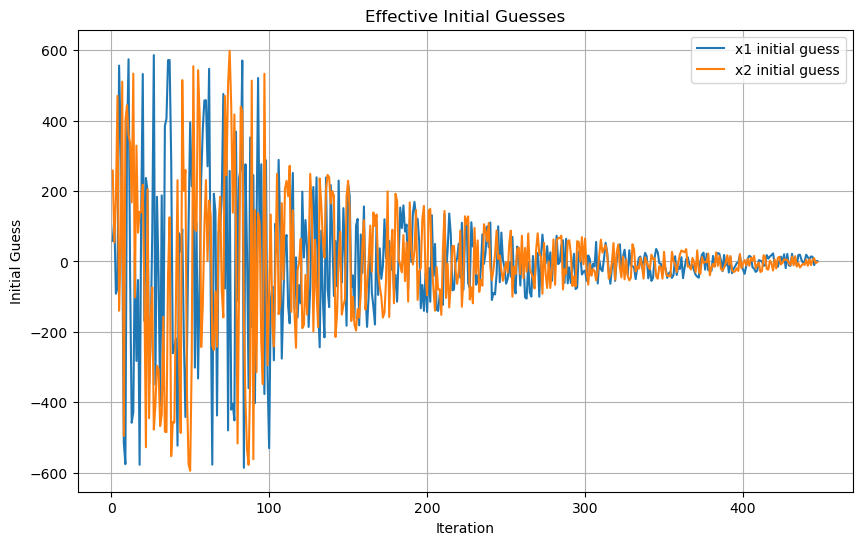

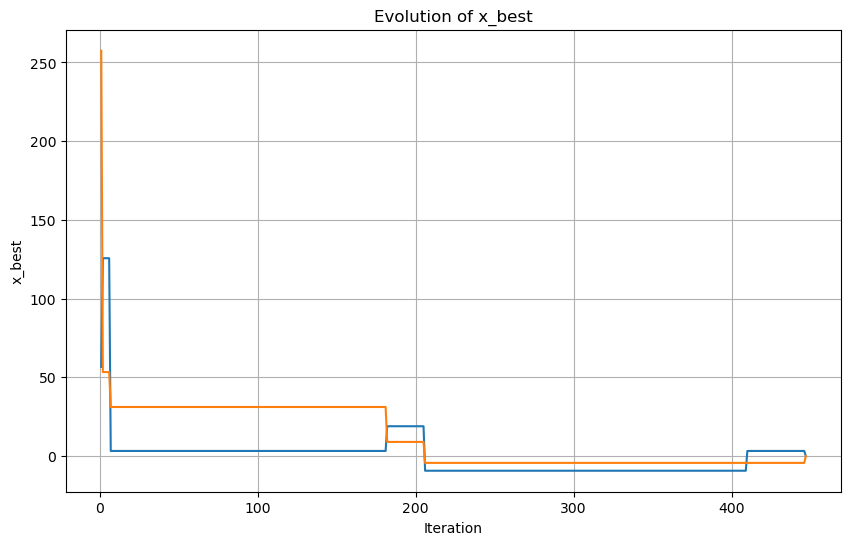

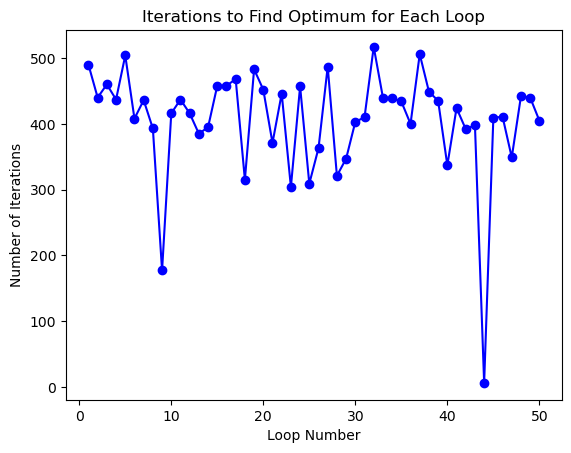

In [19]:
# Step 1: setup
bounds = [-600, 600]
tolerance = 1e-8
K_warmup_3b = 100
K_max = 1000
np.random.seed(0)

# Step 2: Define the refined global optimizer
def refined_global_optimizer(bounds, tolerance, K_warmup, K_max):
    # Initialize the parameters
    x_best = None  
    f_best = None  
    iterations = 0  
    initial_guesses = []  
    x_best_values = []  

    # Step 3: Execute the iteration process
    for k in range(K_max):
        iterations += 1  # increase the iteration count
        x = np.random.uniform(bounds[0], bounds[1], size=2)  # set up a random initial guess for x_k
        if k < K_warmup: # within warmup, use the initial guess for the optimizer
            x
        else:
            chi = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))  # After the warmup, first calculate chi
            x = chi * x + (1 - chi) * x_best  # Then, use chi to calculate x^k0.

        initial_guesses.append(x)  # Store the initial guess

        # Step 4: Run optimizer with current initial guess
        result = minimize(griewank, x, method='BFGS', tol=tolerance)
        x_k_star = result.x  # Store the results from the optimizer
        f_k_star = result.fun  

        # Step 5: Update the best solution and function value (if it fulfills the condition)
        if f_best is None or f_k_star < f_best:
            x_best = x_k_star
            f_best = f_k_star

        x_best_values.append(x_best)  # Store x_best

        # Step 6: Check if the global minimum is found
        if f_best < tolerance:
            break

    return x_best, iterations, initial_guesses, x_best_values

# Step 2: Run the refined global optimizer with the new warmup
best_solution_3b, num_iterations_3b, initial_guesses_3b, x_best_values_3b = refined_global_optimizer(bounds, tolerance, K_warmup_3b, K_max)

# Step 3: Print the final solution and the number of iterations
print(f"K_warmup = {K_warmup_3b}:")
print("Final Solution:", best_solution_3b)
print("Number of Iterations:", num_iterations_3b)

# Step 4: Plot the initial guesses
x_values_3b = np.arange(1, num_iterations_3b + 1)
x1_initial_3b = [x[0] for x in initial_guesses_3b]
x2_initial_3b = [x[1] for x in initial_guesses_3b]

plt.figure(figsize=(10, 6))
plt.plot(x_values_3b, x1_initial_3b, label='x1 initial guess')
plt.plot(x_values_3b, x2_initial_3b, label='x2 initial guess')
plt.xlabel('Iteration')
plt.ylabel('Initial Guess')
plt.title('Effective Initial Guesses')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Plot the evolution of x_best
plt.figure(figsize=(10, 6))
plt.plot(x_values_3b, x_best_values_3b)
plt.xlabel('Iteration')
plt.ylabel('x_best')
plt.title('Evolution of x_best')
plt.grid(True)
plt.show()

# Step 6: Run the refined global optimizer 50 times and store iteration counts
iteration_counts_all_k100 = []
for loop in range(1, 51):
    _, iteration_counts, _, _ = refined_global_optimizer(bounds, tolerance, K_warmup, K_max)
    iteration_counts_all_k100.append(iteration_counts)

mean_iterations_100 = np.mean(iteration_counts_all_k100)

# Step 7: Plot the iteration counts for each run
plt.plot(range(1, 51), iteration_counts_all_k100, 'bo-')
plt.xlabel("Loop Number")
plt.ylabel("Number of Iterations")
plt.title("Iterations to Find Optimum for Each Loop")
plt.show()


Results:

The refined global optimizer still consistently finds the global minimum. The graphs fundamentally display the same relationships. In the first graph, the increased number of warmup rounds are shown in the high variance of the first 100 initial guesses. This is because these guesses are purely random. After that, the convergence follows the same pattern as the in question 1. The same phenomenon holds for the second graph. The third graph shows the number of iterations needed in 50 runs of the refined global optimiser.

In [22]:
# Is the convergence faster?

difference = mean_iterations_10 - mean_iterations_100
print("mean iteration count for K_ = 10:", mean_iterations_10)
print("mean iteration count for K_ = 100:",mean_iterations_100)
print("Difference between the two mean iteration counts", difference)

mean iteration count for K_ = 10: 322.44
mean iteration count for K_ = 100: 405.58
Difference between the two mean iteration counts -83.13999999999999


For our seed of random values, increasing the warmup does not lead to a faster convergence. On average, the solution takes significantly more iterations in the second setup.